# Housing Price Prediction 

In [1]:
## importing packages 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
## loading dataset 
file = 'Ames Housing Dataset.xlsx'

ah_df = pd.read_excel(io = file)

ah_df.head()

,Order,Lot_Area,Street,Lot_Config,Neighborhood,Overall_Qual,Overall_Cond,Mas_Vnr_Area,Total_Bsmt_SF,First_Flr_SF,...,Full_Bath,Half_Bath,Kitchen_AbvGr,TotRms_AbvGr,Fireplaces,Garage_Cars,Garage_Area,Porch_Area,Pool_Area,Sale_Price
0,1,31770,Pave,Corner,NAmes,6,5,112.0,1080.0,1656,...,1,0,1,7,2,2.0,528.0,272,0,215000
1,2,11622,Pave,Inside,NAmes,5,6,0.0,882.0,896,...,1,0,1,5,0,1.0,730.0,260,0,105000
2,3,14267,Pave,Corner,NAmes,6,6,108.0,1329.0,1329,...,1,1,1,6,0,1.0,312.0,429,0,172000
3,4,11160,Pave,Corner,NAmes,7,5,0.0,2110.0,2110,...,2,1,1,8,2,2.0,522.0,0,0,244000
4,5,13830,Pave,Inside,Gilbert,5,5,0.0,928.0,928,...,2,1,1,6,1,2.0,482.0,246,0,189900


### EDA / Feature Engineering 

In [3]:
## dataset info
ah_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order          2930 non-null   int64  
 1   Lot_Area       2930 non-null   int64  
 2   Street         2930 non-null   object 
 3   Lot_Config     2930 non-null   object 
 4   Neighborhood   2930 non-null   object 
 5   Overall_Qual   2930 non-null   int64  
 6   Overall_Cond   2930 non-null   int64  
 7   Mas_Vnr_Area   2907 non-null   float64
 8   Total_Bsmt_SF  2929 non-null   float64
 9   First_Flr_SF   2930 non-null   int64  
 10  Second_Flr_SF  2930 non-null   int64  
 11  Gr_Liv_Area    2930 non-null   int64  
 12  Full_Bath      2930 non-null   int64  
 13  Half_Bath      2930 non-null   int64  
 14  Kitchen_AbvGr  2930 non-null   int64  
 15  TotRms_AbvGr   2930 non-null   int64  
 16  Fireplaces     2930 non-null   int64  
 17  Garage_Cars    2929 non-null   float64
 18  Garage_A

In [4]:
ah_df.describe()

,Order,Lot_Area,Overall_Qual,Overall_Cond,Mas_Vnr_Area,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Kitchen_AbvGr,TotRms_AbvGr,Fireplaces,Garage_Cars,Garage_Area,Porch_Area,Pool_Area,Sale_Price
count,2930.00000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,10147.921843,6.094881,5.563140,101.896801,1051.614544,1159.557679,335.455973,1499.690444,1.566553,0.379522,1.044369,6.443003,0.599317,1.766815,472.819734,182.891468,2.243345,180796.060068
std,845.96247,7880.017759,1.411026,1.111537,179.112611,440.615067,391.890885,428.395715,505.508887,0.552941,0.502629,0.214076,1.572964,0.647921,0.760566,215.046549,159.834420,35.597181,79886.692357
min,1.00000,1300.000000,1.000000,1.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12789.000000
25%,733.25000,7440.250000,5.000000,5.000000,0.000000,793.000000,876.250000,0.000000,1126.000000,1.000000,0.000000,1.000000,5.000000,0.000000,1.000000,320.000000,48.000000,0.000000,129500.000000
50%,1465.50000,9436.500000,6.000000,5.000000,0.000000,990.000000,1084.000000,0.000000,1442.000000,2.000000,0.000000,1.000000,6.000000,1.000000,2.000000,480.000000,165.000000,0.000000,160000.000000
75%,2197.75000,11555.250000,7.000000,6.000000,164.000000,1302.000000,1384.000000,703.750000,1742.750000,2.000000,1.000000,1.000000,7.000000,1.000000,2.000000,576.000000,266.000000,0.000000,213500.000000
max,2930.00000,215245.000000,10.000000,9.000000,1600.000000,6110.000000,5095.000000,2065.000000,5642.000000,4.000000,2.000000,3.000000,15.000000,4.000000,5.000000,1488.000000,1424.000000,800.000000,755000.000000


In [5]:
## log transforming the target variable 
ah_df['log_sale_price'] = np.log(ah_df['Sale_Price'])

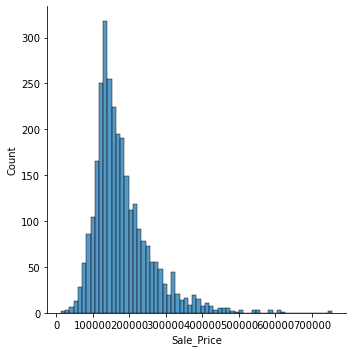

In [6]:
## plot without log os sale price 
sns.displot (data = ah_df, 
            x = 'Sale_Price')
plt.show()

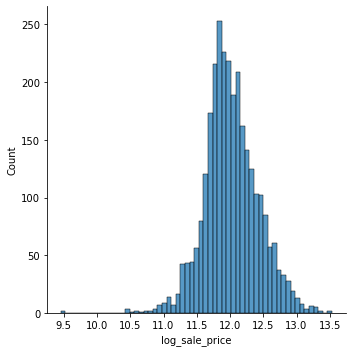

In [7]:
## plot with the log transformation 
sns.displot (data = ah_df,
            x = 'log_sale_price')
plt.show()

In [8]:
## checking for null values 
ah_df.isnull().sum(axis = 0)

Order              0
Lot_Area           0
Street             0
Lot_Config         0
Neighborhood       0
Overall_Qual       0
Overall_Cond       0
Mas_Vnr_Area      23
Total_Bsmt_SF      1
First_Flr_SF       0
Second_Flr_SF      0
Gr_Liv_Area        0
Full_Bath          0
Half_Bath          0
Kitchen_AbvGr      0
TotRms_AbvGr       0
Fireplaces         0
Garage_Cars        1
Garage_Area        1
Porch_Area         0
Pool_Area          0
Sale_Price         0
log_sale_price     0
dtype: int64

In [9]:
## imputation 
## Mas_Vnr_Area
fill = 0 
ah_df['Mas_Vnr_Area'] = ah_df['Mas_Vnr_Area'].fillna(fill)

## Total_Bsmt_SF
fill = 0 
ah_df['Total_Bsmt_SF'] = ah_df['Total_Bsmt_SF'].fillna(fill)

## Garage_Cars
fill = 0
ah_df['Garage_Cars'] = ah_df['Garage_Cars'].fillna(fill)

## Garaga_Area
fill = 0
ah_df['Garage_Area'] = ah_df['Garage_Area'].fillna(fill)


In [10]:
## checking for null values again
ah_df.isnull().sum(axis = 0)

Order             0
Lot_Area          0
Street            0
Lot_Config        0
Neighborhood      0
Overall_Qual      0
Overall_Cond      0
Mas_Vnr_Area      0
Total_Bsmt_SF     0
First_Flr_SF      0
Second_Flr_SF     0
Gr_Liv_Area       0
Full_Bath         0
Half_Bath         0
Kitchen_AbvGr     0
TotRms_AbvGr      0
Fireplaces        0
Garage_Cars       0
Garage_Area       0
Porch_Area        0
Pool_Area         0
Sale_Price        0
log_sale_price    0
dtype: int64

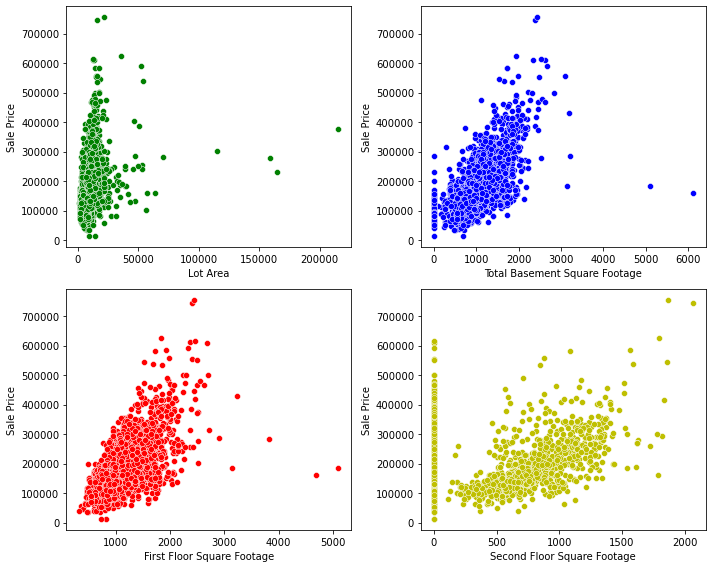

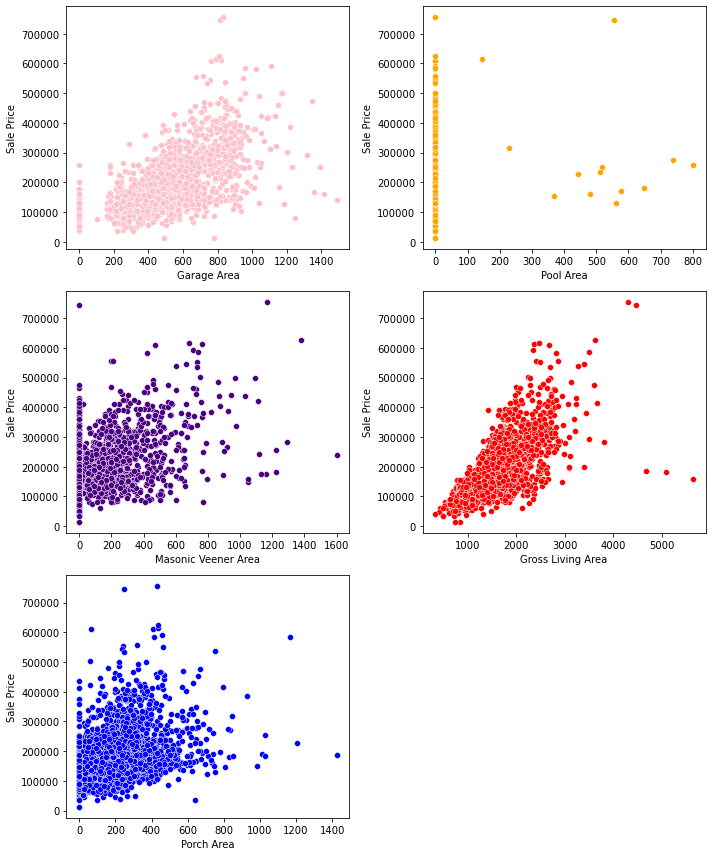

In [11]:
## scatterplots for continuos variables 
## setting fig size 
fig, ax = plt.subplots(figsize = (10,8))

## lot area
plt.subplot(2,2,1) ## for more than one plot on same cell
sns.scatterplot(x = ah_df['Lot_Area'],
               y = ah_df['Sale_Price'],
               color = 'g')
## labels 
plt.xlabel(xlabel = 'Lot Area')
plt.ylabel(ylabel = 'Sale Price')

####################
## Total_Bsmt_SF
plt.subplot(2,2,2)
sns.scatterplot(x = ah_df['Total_Bsmt_SF'],
               y = ah_df['Sale_Price'],
               color = 'b')
plt.xlabel(xlabel = 'Total Basement Square Footage')
plt.ylabel(ylabel = 'Sale Price')

########################
## First_Flr_SF
plt.subplot(2,2,3)
sns.scatterplot(x = ah_df['First_Flr_SF'],
               y = ah_df['Sale_Price'],
               color = 'r')
plt.xlabel(xlabel = 'First Floor Square Footage')
plt.ylabel(ylabel = 'Sale Price')

#########################
## Second_Floor_SF
plt.subplot(2,2,4)
sns.scatterplot(x = ah_df['Second_Flr_SF'],
               y = ah_df['Sale_Price'],
               color = 'y')
plt.xlabel(xlabel = 'Second Floor Square Footage')
plt.ylabel(ylabel = 'Sale Price')

## cleaning up the layout, saving figs, displaing results 
plt.tight_layout()
plt.savefig('./analysis_images/Housing Scatterplots 1 of 2.png')
plt.show()

############################
fig, ax = plt.subplots(figsize = (10, 12))

## Garage Area
plt.subplot(3,2,1)
sns.scatterplot(x = ah_df['Garage_Area'],
               y = ah_df['Sale_Price'],
               color = 'pink')
plt.xlabel(xlabel = 'Garage Area')
plt.ylabel(ylabel = 'Sale Price')

##################################
## Pool Area
plt.subplot(3,2,2)
sns.scatterplot(x = ah_df['Pool_Area'],
               y = ah_df['Sale_Price'],
               color = 'orange')
plt.xlabel(xlabel = 'Pool Area')
plt.ylabel(ylabel = 'Sale Price')

##################################
## Mas_Vnr_Area
plt.subplot(3,2,3)
sns.scatterplot(x = ah_df['Mas_Vnr_Area'],
               y = ah_df['Sale_Price'],
               color = 'indigo')
plt.xlabel(xlabel = 'Masonic Veener Area')
plt.ylabel(ylabel = 'Sale Price')

################################
## Gr_Liv_Area
plt.subplot(3,2,4)
sns.scatterplot(x = ah_df['Gr_Liv_Area'],
               y = ah_df['Sale_Price'],
               color = 'r')
plt.xlabel(xlabel = 'Gross Living Area')
plt.ylabel(ylabel = 'Sale Price')

###############################
## Porch_Area
plt.subplot(3,2,5)
sns.scatterplot(x = ah_df['Porch_Area'],
               y = ah_df['Sale_Price'],
               color = 'b')
plt.xlabel(xlabel = 'Porch Area')
plt.ylabel(ylabel = 'Sale Price')

## Cleaning up plot, svaing fig, displaying fig 
plt.tight_layout()
plt.savefig('./analysis_images/Housing Scatterplots 2 of 2.png')
plt.show()

In [12]:
## FROM CHASE 
# counting the number of zeroes
bsmt_zeroes   = len(ah_df['Total_Bsmt_SF'][ah_df['Total_Bsmt_SF'] == 0])
sf_zeroes     = len(ah_df['Second_Flr_SF'][ah_df['Second_Flr_SF'] == 0])
garage_zeroes = len(ah_df['Garage_Area'][ah_df['Garage_Area'] == 0])
pool_zeroes   = len(ah_df['Pool_Area'][ah_df['Pool_Area'] == 0])
mas_zeroes    = len(ah_df['Mas_Vnr_Area'][ah_df['Mas_Vnr_Area'] == 0])
porch_zeroes  = len(ah_df['Porch_Area'][ah_df['Porch_Area'] == 0])


## the table below has been coded for you ##

# printing a table of the results
print(f"""
                 No\t\tYes
               ---------------------
Basement       | {bsmt_zeroes}\t\t{len(ah_df) - bsmt_zeroes}
Second Floor   | {sf_zeroes}\t\t{len(ah_df) - sf_zeroes}
Garage         | {garage_zeroes}\t\t{len(ah_df) - garage_zeroes}
Pool           | {pool_zeroes}\t\t{len(ah_df) - pool_zeroes}
Masonic Veneer | {mas_zeroes}\t\t{len(ah_df) - mas_zeroes}
Porch          | {porch_zeroes}\t\t{len(ah_df) - porch_zeroes}
""")



                 No		Yes
               ---------------------
Basement       | 80		2850
Second Floor   | 1678		1252
Garage         | 158		2772
Pool           | 2917		13
Masonic Veneer | 1771		1159
Porch          | 484		2446



In [13]:
## dummy variables for having a basement 
ah_df['has_Basement'] = 0
ah_df['has_Second_Flr'] = 0
ah_df['has_Garage'] = 0
ah_df['has_Mas_Vnr_Area'] = 0
ah_df['has_Porch'] = 0

for index, value in ah_df.iterrows():
    
    ## Total_Bsmt_SF
    if ah_df.loc[index, 'Total_Bsmt_SF'] > 0:
        ah_df.loc[index, 'has_Basement'] = 1
    
    ## Second_Flr_SF
    if ah_df.loc[index, 'Second_Flr_SF'] > 0:
        ah_df.loc[index, 'has_Second_Flr'] = 1
    
    ## Garage_Area
    if ah_df.loc[index, 'Garage_Area'] > 0:
        ah_df.loc[index, 'has_Garage'] = 1
        
    ## Mas_Vnr_Area
    if ah_df.loc[index, 'Mas_Vnr_Area'] > 0:
        ah_df.loc[index, 'has_Mas_Vnr_Area'] = 1
        
    ## Porch_Area
    if ah_df.loc[index, 'Porch_Area'] > 0:
        ah_df.loc[index, 'has_Porch'] = 1

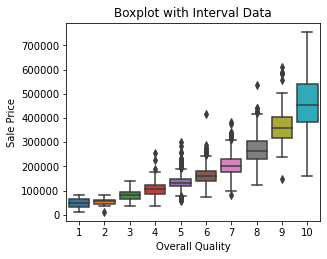

In [14]:
## visualization with interval and count data using boxplots 
fig, ax = plt.subplots(figsize = (10, 8))

## Overall Qual
plt.subplot(2,2,1)
sns.boxplot(x = 'Overall_Qual',
           y = 'Sale_Price',
           data = ah_df)

## titles and axis labels
plt.title(label = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Overall Quality')
plt.ylabel (ylabel = 'Sale Price')

## displaying plot
plt.show()


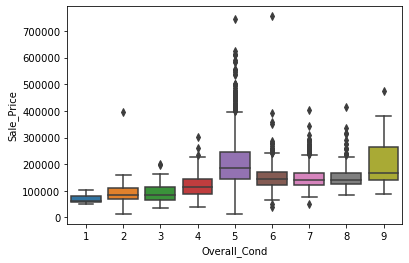

In [15]:
## Overall_Cond 

sns.boxplot(x = 'Overall_Cond',
           y = 'Sale_Price',
           data = ah_df)

plt.xlabel(xlabel = 'Overall_Cond')
plt.ylabel(ylabel = 'Sale_Price')

plt.show()

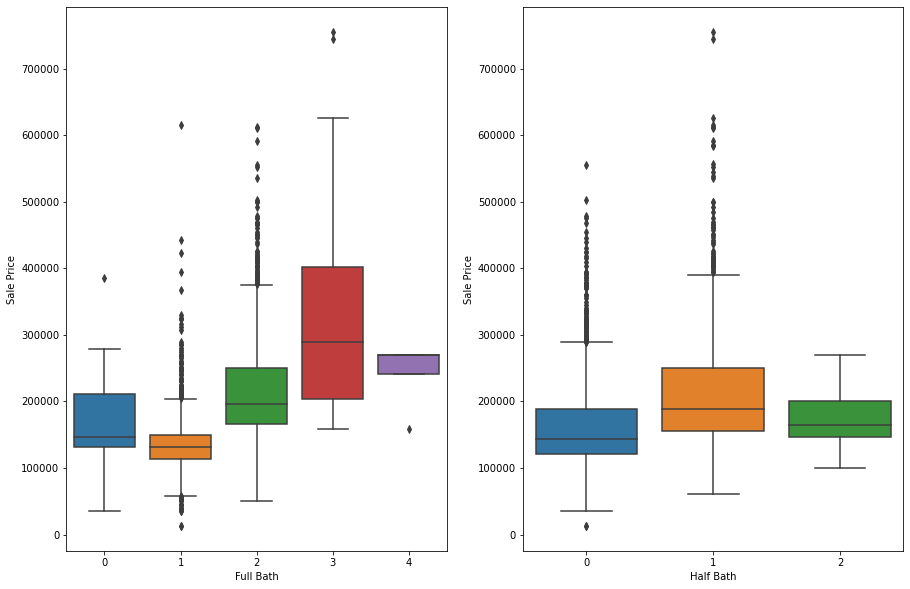


Full Baths
----------
0      12
1    1318
2    1532
3      64
4       4
Name: Full_Bath, dtype: int64

Half Baths
----------
0    1843
1    1062
2      25
Name: Half_Bath, dtype: int64




In [16]:
fig, ax = plt.subplots(figsize = (15,10))

## Full Bath
plt.subplot(1,2,1)
sns.boxplot(x = 'Full_Bath',
           y = 'Sale_Price',
           data = ah_df)

plt.xlabel(xlabel = 'Full Bath')
plt.ylabel(ylabel = 'Sale Price')



## Half Bath
plt.subplot(1,2,2)
sns.boxplot(x = 'Half_Bath',
           y = 'Sale_Price',
           data = ah_df)

plt.xlabel(xlabel = 'Half Bath')
plt.ylabel(ylabel = 'Sale Price')

plt.show()


## count of full baths and half baths 
print(f"""
Full Baths
----------
{ah_df['Full_Bath'].value_counts(normalize = False).sort_index()}

Half Baths
----------
{ah_df['Half_Bath'].value_counts(normalize = False).sort_index()}

""")

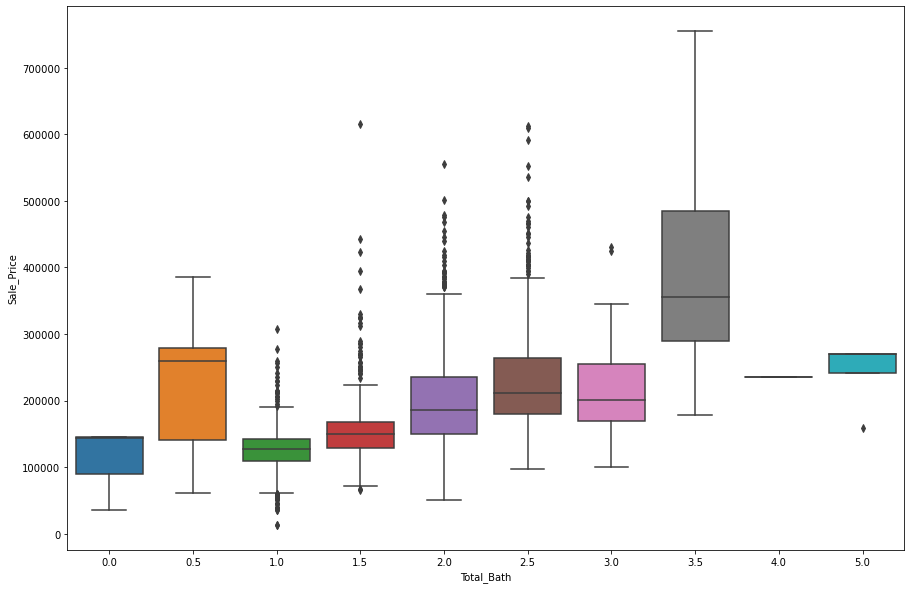

 
Total Baths
-----------
0.0      3
0.5      5
1.0    951
1.5    365
2.0    869
2.5    659
3.0     40
3.5     33
4.0      1
5.0      4
Name: Total_Bath, dtype: int64



In [17]:
## Total Baths 
ah_df['Total_Bath'] = ah_df['Full_Bath'] + (ah_df['Half_Bath'] / 2)

fig, ax = plt.subplots(figsize = (15, 10))

## boxplot
sns.boxplot(x = 'Total_Bath',
           y = 'Sale_Price',
           data = ah_df)


plt.xlabel(xlabel = 'Total_Bath')
plt.ylabel (ylabel = 'Sale_Price')

plt.show()


## count of total rooms 
print(f""" 
Total Baths
-----------
{ah_df['Total_Bath'].value_counts (normalize = False).sort_index()}
""")

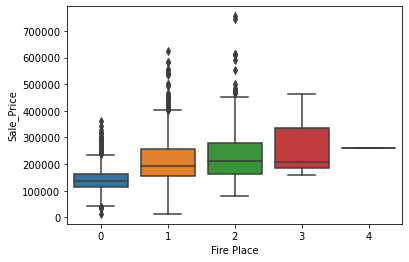

In [18]:
## Fire place 
sns.boxplot (x = 'Fireplaces',
            y = 'Sale_Price',
            data = ah_df)

plt.xlabel(xlabel = 'Fire Place')
plt.ylabel(ylabel = 'Sale_Price')

plt.show()

In [19]:
# defining a function for categorical boxplots
def categorical_boxplots(response, cat_var, data):
    """
	This function is designed to generate a boxplot that can be used for categorical variables.
    Make sure matplotlib.pyplot and seaborn have been imported (as plt and sns).

    PARAMETERS
	----------
	response : str, response variable
	cat_var  : str, categorical variable
	data     : DataFrame of the response and categorical variables
	"""

    fig, ax = plt.subplots(figsize = (10, 8))
    
    sns.boxplot(x    = response,
                y    = cat_var,
                data = data)
    
    plt.suptitle("")
    plt.show()

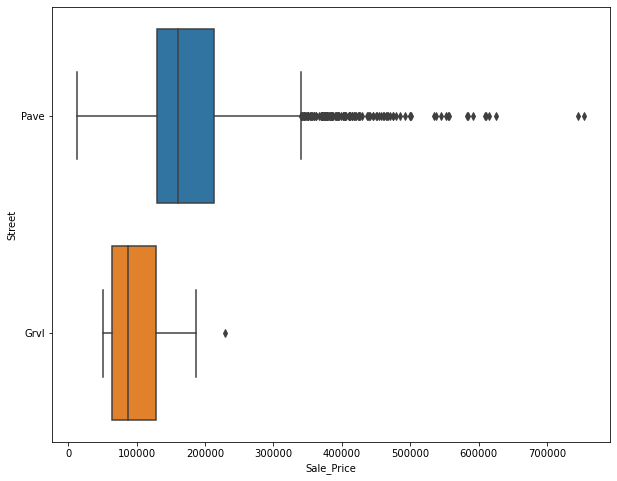

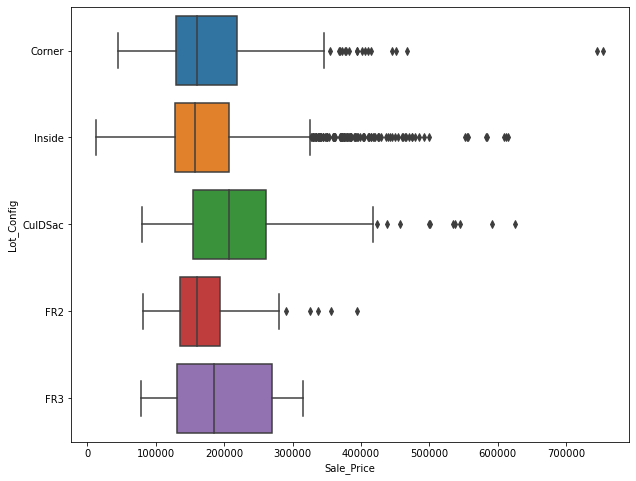

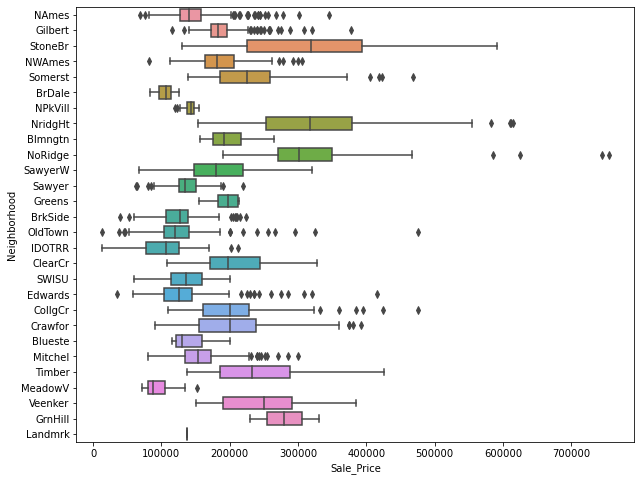

In [20]:
# calling the function for Street
categorical_boxplots(response = 'Sale_Price',
					 cat_var  = 'Street',
					 data     = ah_df)


# calling the function for Lot_Config
categorical_boxplots(response = 'Sale_Price',
					 cat_var  = 'Lot_Config',
					 data     = ah_df)


# calling the function for Neighborhood
categorical_boxplots(response = 'Sale_Price',
					 cat_var  = 'Neighborhood',
					 data     = ah_df)


In [21]:
# one hot encoding categorical variables
one_hot_Street       = pd.get_dummies(ah_df['Street'])
one_hot_Lot          = pd.get_dummies(ah_df['Lot_Config'])
one_hot_Neighborhood = pd.get_dummies(ah_df['Neighborhood'])


# dropping categorical variables after they've been encoded
ah_df = ah_df.drop('Street', axis = 1)
ah_df = ah_df.drop('Lot_Config', axis = 1)
ah_df = ah_df.drop('Neighborhood', axis = 1)


# joining codings together
ah_df = ah_df.join([one_hot_Street, one_hot_Lot, one_hot_Neighborhood])


# saving new columns
new_columns = ah_df.columns

In [22]:
## checking
ah_df.head()

,Order,Lot_Area,Overall_Qual,Overall_Cond,Mas_Vnr_Area,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,1,31770,6,5,112.0,1080.0,1656,0,1656,1,...,0,0,0,0,0,0,0,0,0,0
1,2,11622,5,6,0.0,882.0,896,0,896,1,...,0,0,0,0,0,0,0,0,0,0
2,3,14267,6,6,108.0,1329.0,1329,0,1329,1,...,0,0,0,0,0,0,0,0,0,0
3,4,11160,7,5,0.0,2110.0,2110,0,2110,2,...,0,0,0,0,0,0,0,0,0,0
4,5,13830,5,5,0.0,928.0,928,701,1629,2,...,0,0,0,0,0,0,0,0,0,0


In [23]:
## Pearson Correlation
df_corr = ah_df.corr().round(2)


# printing (Pearson) correlations with SalePrice
print(df_corr.loc['Sale_Price'].sort_values(ascending = False))

Sale_Price        1.00
log_sale_price    0.95
Overall_Qual      0.80
Gr_Liv_Area       0.71
Garage_Cars       0.65
                  ... 
BrkSide          -0.14
Edwards          -0.17
IDOTRR           -0.17
NAmes            -0.19
OldTown          -0.21
Name: Sale_Price, Length: 61, dtype: float64


In [24]:
## Machine Learning 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

In [25]:
## explanatory variables 
## making copy of dataset
ah_df_data= ah_df.copy()

## droppong sales price, order from the target set 
ah_df_data = ah_df.drop(['Order', 'Sale_Price', 'log_sale_price'], axis = 1)


## Target Variable
ah_df_target = ah_df.loc[:, 'log_sale_price']

In [26]:
## Train test split 
X_train, X_test, y_train, y_test = train_test_split (
                                                    ah_df_data,
                                                    ah_df_target,
                                                    test_size = 0.25,
                                                    random_state = 219)

## checking shapes 
print(f""" 
Training Data
-------------
X_side: {X_train.shape}
y_side: {y_train.shape}


Testing Data
------------
X_side: {X_test.shape}
y_side: {y_test.shape}

""")

 
Training Data
-------------
X_side: (2197, 58)
y_side: (2197,)


Testing Data
------------
X_side: (733, 58)
y_side: (733,)




### Linear Regression

In [27]:
## Instatiate model object
lr = LinearRegression()

## Fitting to the training data 
lr_fit = lr.fit(X_train, y_train)

## predict on new data 
lr_pred = lr_fit.predict(X_test)

## scoring results 
print ('LR Train Score:', lr.score(X_train, y_train).round(4))
print ('LR Test Score:', lr.score(X_test, y_test).round(4))

## saving results 
lr_train_score = lr.score(X_train, y_train).round(4)
lr_test_score =  lr.score(X_test, y_test).round(4)

## train-test gap ps: gaps are usually between 0 t0 0.005. anything above isn't okay 
print('LR Train-Test Gap:', abs(lr_train_score - lr_test_score). round(4))
lr_test_gap = abs(lr_train_score - lr_test_score). round(4)

## cross validation score (evaluating the model)
## we cross validate on the train set
## compute 5-fold cross-validation scores: cv_scores 
lr_cv_scores = cross_val_score(lr, X_train, y_train, cv=5)

## print the 5-fold cross-validation scores 
print('CV_scores:', lr_cv_scores.round(4))

print('Average 5-fold CV score:', format(np.mean(lr_cv_scores).round(4)))

## Saving results 
lr_avg_cv_score = format(np.mean(lr_cv_scores).round(4))


LR Train Score: 0.8705
LR Test Score: 0.8857
LR Train-Test Gap: 0.0152
CV_scores: [0.9053 0.7762 0.828  0.8396 0.8776]
Average 5-fold CV score: 0.8453


In [28]:
# zipping each feature name to its coefficient
lr_model_values = zip(ah_df_data.columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 10.45)
('Lot_Area', 0.0)
('Overall_Qual', 0.08)
('Overall_Cond', 0.05)
('Mas_Vnr_Area', -0.0)
('Total_Bsmt_SF', 0.0)
('First_Flr_SF', 0.0)
('Second_Flr_SF', 0.0)
('Gr_Liv_Area', 0.0)
('Full_Bath', 0.02)
('Half_Bath', 0.02)
('Kitchen_AbvGr', -0.08)
('TotRms_AbvGr', 0.01)
('Fireplaces', 0.04)
('Garage_Cars', 0.05)
('Garage_Area', 0.0)
('Porch_Area', 0.0)
('Pool_Area', -0.0)
('has_Basement', 0.09)
('has_Second_Flr', -0.05)
('has_Garage', -0.0)
('has_Mas_Vnr_Area', 0.01)
('has_Porch', 0.01)
('Total_Bath', 0.03)
('Grvl', -0.11)
('Pave', 0.11)
('Corner', -0.0)
('CulDSac', 0.04)
('FR2', -0.03)
('FR3', -0.01)
('Inside', 0.01)
('Blmngtn', 0.02)
('Blueste', -0.14)
('BrDale', -0.21)
('BrkSide', -0.13)
('ClearCr', 0.02)
('CollgCr', 0.07)
('Crawfor', 0.07)
('Edwards', -0.11)
('Gilbert', 0.05)
('Greens', 0.02)
('GrnHill', 0.55)
('IDOTRR', -0.25)
('Landmrk', -0.0)
('MeadowV', -0.2)
('Mitchel', 0.01)
('NAmes', -0.04)
('NPkVill', -0.12)
('NWAmes', -0.05)
('NoRidge', 0.15)
('NridgHt', 0.19

### ARD Model 

In [29]:
# INSTANTIATING a model object
ard_model = ARDRegression(normalize = False)


# FITTING the training data
ard_fit = ard_model.fit(X_train, y_train)


# PREDICTING on new data
ard_pred = ard_fit.predict(X_test)


print('ARD Training Score:', ard_model.score(X_train, y_train).round(4))
print('ARD Testing Score :',  ard_model.score(X_test, y_test). round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(X_train, y_train).round(4)
ard_test_score  =  ard_model.score(X_test, y_test). round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

## compute 5-fold cross-validation scores: cv_scores 
ard_cv_scores = cross_val_score(ard_model, X_train, y_train, cv=5)

## print the 5-fold cross-validation scores 
print('CV_scores:', ard_cv_scores.round(4))

print('Average 5-fold CV score:', format(np.mean(ard_cv_scores).round(4)))

## Saving results 
ard_avg_cv_score = format(np.mean(ard_cv_scores).round(4))


ARD Training Score: 0.8355
ARD Testing Score : 0.8345
ARD Train-Test Gap : 0.001
CV_scores: [0.8694 0.8252 0.8237 0.8016 0.8202]
Average 5-fold CV score: 0.828


In [30]:
# zipping each feature name to its coefficient
ard_model_values = zip(ah_df_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 10.4)
('Lot_Area', 0.0)
('Overall_Qual', 0.11413)
('Overall_Cond', 0.04404)
('Mas_Vnr_Area', 0.0)
('Total_Bsmt_SF', 0.0)
('First_Flr_SF', 0.0)
('Second_Flr_SF', 0.0)
('Gr_Liv_Area', 0.0)
('Full_Bath', 0.0)
('Half_Bath', 0.0)
('Kitchen_AbvGr', -0.02475)
('TotRms_AbvGr', 0.0)
('Fireplaces', 0.08148)
('Garage_Cars', 0.09573)
('Garage_Area', 0.0)
('Porch_Area', 0.0)
('Pool_Area', 0.0)
('has_Basement', 0.15629)
('has_Second_Flr', -0.02815)
('has_Garage', 0.0)
('has_Mas_Vnr_Area', 0.0)
('has_Porch', 0.0)
('Total_Bath', 0.13173)
('Grvl', -0.10673)
('Pave', 0.10673)
('Corner', 0.0)
('CulDSac', 0.04685)
('FR2', -0.05752)
('FR3', -0.00232)
('Inside', 0.0)
('Blmngtn', -0.00935)
('Blueste', -0.23099)
('BrDale', -0.26257)
('BrkSide', -0.09299)
('ClearCr', 0.09998)
('CollgCr', 0.05681)
('Crawfor', 0.10384)
('Edwards', -0.04424)
('Gilbert', -0.01182)
('Greens', -0.04897)
('GrnHill', 0.4251)
('IDOTRR', -0.2046)
('Landmrk', 0.0)
('MeadowV', -0.19362)
('Mitchel', 0.02683)
('NAmes', 0.0)
('

### Ridge Regression 

In [31]:
## instantiate model object 
ridge_model = Ridge(alpha = 0.4, normalize = True)


# FITTING the training data
ridge_fit = ridge_model.fit(X_train, y_train)


# PREDICTING on new data
ridge_pred = ridge_fit.predict(X_test)


print('RIDGE Training Score:', ridge_model.score(X_train, y_train).round(4))
print('RIDGE Testing Score :',  ridge_model.score(X_test, y_test). round(4))


# saving scoring data for future use
ridge_train_score = ridge_model.score(X_train, y_train).round(4)
ridge_test_score  =  ridge_model.score(X_test, y_test). round(4)


# displaying and saving the gap betweridge training and testing
print('RIDGE Train-Test Gap :', abs(ridge_train_score - ridge_test_score).round(4))
ridge_test_gap = abs(ridge_train_score - ridge_test_score).round(4)

## compute 5-fold cross-validation scores: cv_scores 
ridge_cv_scores = cross_val_score(ridge_model, X_train, y_train, cv=5)

## print the 5-fold cross-validation scores 
print('CV_scores:', ridge_cv_scores.round(4))

print('Average 5-fold CV score:', format(np.mean(ridge_cv_scores).round(4)))

## Saving results 
ridge_avg_cv_score = format(np.mean(ridge_cv_scores).round(4))

RIDGE Training Score: 0.8564
RIDGE Testing Score : 0.8729
RIDGE Train-Test Gap : 0.0165
CV_scores: [0.8935 0.7909 0.8199 0.8235 0.8768]
Average 5-fold CV score: 0.8409


In [32]:
# zipping each feature name to its coefficient
ridge_model_values = zip(ah_df_data.columns, ridge_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ridge_model_lst = [('intercept', ridge_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ridge_model_values:
    ridge_model_lst.append(val)
    

# checking the results
for pair in ridge_model_lst:
    print(pair)


('intercept', 10.58)
('Lot_Area', 0.0)
('Overall_Qual', 0.05875)
('Overall_Cond', 0.03254)
('Mas_Vnr_Area', 4e-05)
('Total_Bsmt_SF', 8e-05)
('First_Flr_SF', 8e-05)
('Second_Flr_SF', 3e-05)
('Gr_Liv_Area', 7e-05)
('Full_Bath', 0.04145)
('Half_Bath', 0.03009)
('Kitchen_AbvGr', -0.08729)
('TotRms_AbvGr', 0.01143)
('Fireplaces', 0.0409)
('Garage_Cars', 0.04438)
('Garage_Area', 0.00014)
('Porch_Area', 0.00011)
('Pool_Area', -0.00011)
('has_Basement', 0.08953)
('has_Second_Flr', -0.01007)
('has_Garage', 0.03336)
('has_Mas_Vnr_Area', 0.02048)
('has_Porch', 0.02055)
('Total_Bath', 0.04007)
('Grvl', -0.12433)
('Pave', 0.12433)
('Corner', -0.00889)
('CulDSac', 0.03879)
('FR2', -0.02661)
('FR3', -0.00515)
('Inside', -0.00133)
('Blmngtn', 0.02803)
('Blueste', -0.07009)
('BrDale', -0.16735)
('BrkSide', -0.07146)
('ClearCr', 0.02198)
('CollgCr', 0.05761)
('Crawfor', 0.08097)
('Edwards', -0.07296)
('Gilbert', 0.03674)
('Greens', 0.07093)
('GrnHill', 0.42877)
('IDOTRR', -0.17141)
('Landmrk', 0.0)
('Me

### Comparing Results 

In [33]:
## comparing results 
# comparing results

print(f"""
Model      Train Score      Test Score           Avg 5-fold CV score
-----      -----------      ----------           --------------------
OLS        {lr_train_score}            {lr_test_score}             {lr_avg_cv_score}
ARD        {ard_train_score}            {ard_test_score}             {ard_avg_cv_score}
Ridge      {ridge_train_score}            {ridge_train_score}             {ridge_avg_cv_score}
""")



# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'Ridge'],
           
    'Training' : [lr_train_score, ard_train_score,
                                   ridge_train_score],
           
    'Testing'  : [lr_test_score, ard_test_score,
                                   ridge_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, ard_test_gap,
                                        ridge_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(ard_model_lst),
                                    len(ridge_model_lst)],
                    
    'Model Coefficients and Vaiables' : [lr_model_lst, ard_model_lst, ridge_model_lst],
    
    'Average CV Score': [lr_avg_cv_score, ard_avg_cv_score, ridge_avg_cv_score]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./model_results/ames_housing_linear_model_performance.xlsx',
                           index = False)


Model      Train Score      Test Score           Avg 5-fold CV score
-----      -----------      ----------           --------------------
OLS        0.8705            0.8857             0.8453
ARD        0.8355            0.8345             0.828
Ridge      0.8564            0.8564             0.8409



### Final Model 

In [34]:
# comparing results

print(f"""
Model      Train Score      Test Score      Avg 5-fold CV score
-----      -----------      ----------      -------------------
OLS        {lr_train_score}            {lr_test_score}         {lr_avg_cv_score}

""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS'],
           
    'Training' : [lr_train_score],
           
    'Testing'  : [lr_test_score],
                    
    'Train-Test Gap' : [lr_test_gap],
                    
    'Model Size' : [len(lr_model_lst)],
                    
    'Model Coefficients and Vaiables' : [lr_model_lst],
    
    'Average CV Score': [lr_avg_cv_score]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./model_results/Final_model_performance_ames_housing.xlsx',
                           index = False)


Model      Train Score      Test Score      Avg 5-fold CV score
-----      -----------      ----------      -------------------
OLS        0.8705            0.8857         0.8453




### Model Predictions  

In [35]:

prediction_results = pd.DataFrame(data = {
    'Original Revenue' : np.exp(y_test).round(),
    'LR Predictions'       : np.exp(lr_pred).round(),
    'ARD Predictions'      : np.exp(ard_pred).round(),
    'Ridge Predictions'    : np.exp(ridge_pred).round (), 
    'LR Deviation'         : np.exp(lr_pred).round() - np.exp(y_test),
    'ARD Deviation'        : np.exp(ard_pred).round() - np.exp(y_test),
    'Ridge Deviation'      : np.exp(ridge_pred).round() - np.exp(y_test)
    })

prediction_results.to_excel(excel_writer = './model_results/ames_housing_linear_model_predictions.xlsx',
                           index = False)

### Saving model for beautiful API

In [36]:
## pip install pickle-mixin

## Pickle in Python is primarily used in serializing and deserializing a Python object structure. 
## In other words, it's the process of converting a Python object into a byte stream to store it 
## in a file/database, maintain program state across sessions, or transport data over the network.

In [37]:
## saving my model: serialization and deserialization 
## sklearns joblib 

import sklearn.externals
import joblib

joblib.dump(lr, 'model.pkl')

print('Model Dumped!')

## deserialization: loaading model into memory
lr = joblib.load('model.pkl')

## deserialization 
model_columns = list(ah_df_data.columns)
joblib.dump(model_columns, 'model_columns.pkl')

print('Models columns dumped!')

Model Dumped!
Models columns dumped!
